You'll consider the types of models that would be appropriate to use given the features in your dataset and then dive right in and build two or three models. Please note: in addition to considering different algorithm types in your model selection, be sure to also consider applying model hyperparameter tuning operations. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy.stats import skew

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm

#Model Building

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,classification_report
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score,  train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA




In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',150)

# Lets import the data 

In [4]:
train= pd.read_csv('data /train_4.csv',index_col=0)

In [5]:
train = train.drop(['Unnamed: 0.1'],axis=1)

In [6]:
test = pd.read_csv('data /test_4.csv',index_col=0)

In [7]:
test= test.drop(['Unnamed: 0.1'],axis=1)

In [8]:
test

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_150
0,1461,4.394449,9.360741,5,1961,1961,0.000000,6.150603,4.976734,5.602119,6.783325,0.000000,0.0,6.799056,0.000000,0.000000,1,0.000000,2,0.693147,0.000000,1961.0,1.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,0,7.483807,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1462,4.406719,9.565775,6,1958,1958,4.691348,6.828712,0.000000,6.008813,7.192934,0.000000,0.0,7.192934,0.000000,0.000000,1,0.693147,3,0.693147,0.000000,1958.0,1.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,0,7.885705,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1463,4.317488,9.534668,5,1997,1998,0.000000,6.674561,0.000000,4.927254,6.834109,6.553933,0.0,7.396335,0.000000,0.000000,2,0.693147,3,0.693147,0.693147,1997.0,2.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,0,7.846981,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1464,4.369448,9.208238,6,1998,1998,3.044522,6.401917,0.000000,5.783825,6.831954,6.520621,0.0,7.380879,0.000000,0.000000,2,0.693147,3,0.693147,0.693147,1998.0,2.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,0,7.836370,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1465,3.784190,8.518392,8,1992,1992,0.000000,5.575949,0.000000,6

In [9]:
test.columns 

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'MSSubClass_150'],
      dtype='object', length=292)

In [10]:
train

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_150
0,1,4.189655,9.042040,7,2003,2003,5.283204,6.561031,0.000000,5.017280,856,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,0.000000,2003.0,2,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,12.247699,7.850493,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,4.394449,9.169623,6,1976,1976,0.000000,6.886532,0.000000,5.652489,1262,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,0.693147,1976.0,2,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.109016,7.833996,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3,4.234107,9.328212,7,2001,2002,5.093750,6.188264,0.000000,6.075346,920,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,0.693147,2001.0,2,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,12.317171,7.903596,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,4,4.110874,9.164401,7,1915,1970,0.000000,5.379897,0.000000,6.293419,756,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,0.693147,1998.0,3,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,11.849405,7.813592,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,4.442651,9.565284,8,2000,2000,5.860786,6.486161,0.000000,6.196444,11

In [11]:


y=train['SalePrice']
X=train.drop(['Id','SalePrice'],axis=1)



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
y_train

1190    12.031725
640     12.520887
1443    11.703554
617     11.566476
1300    12.323860
          ...    
466     12.025755
112     12.858322
456     11.492733
1428    11.686887
759     12.577640
Name: SalePrice, Length: 1092, dtype: float64

In [13]:
X_train.shape

(1092, 290)

## Time to fit and evaluate models 


# Linear Regression 

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


In [15]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
y_head = lr.predict(X_test)
print('-'*10+'Linear Regression'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Root Mean Square Error = ' + str(np.sqrt(mean_squared_error(y_test, y_head)))) 

----------Linear Regression----------
R square Accuracy:  -4.684055414755669e+21
Mean Absolute Error Accuracy:  1798356846.844412
Root Mean Square Error = 26436958853.237644


In [16]:
vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
print(vif)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


[4.190293157633599, 6.525275989039098, 6.563851209866573, 22.819992289997767, 4.659059471222166, 29.758731573136526, 35.753124459565505, 67.64502021040421, 4.0531127130157, 35.984605751369585, 44.84495440865391, 3.168244708063986, 82.43308693024058, 3.2582441661366235, 1.6660484072411244, 4.997456022501901, 3.5940604112967884, 3.482125373200826, 5.089027981849137, 21.00035847510386, 2305.4069956236744, 5.071830467171508, 1.7751003479549143, 2.226513811716767, 1.8835814319552784, 1.4107239537424234, 1.4748364231593363, inf, 36.84388728345423, 131.18369034279925, 13.009058790223678, 4.172306625782404, 55.35923393854235, 127.44719876861863, 30.11500529489613, 5.815479790323231, 27.60633883415543, 69.50369023239588, 119.61567948859184, 31.421200269780304, 19.178360780741105, 36.40624026674809, 13.561305325309878, inf, 22.567574715877488, 6.07704274019471, 76.0559127104524, 54.117182477517076, 2.1336979083974437, 3.284104324756322, 3.2256885343865997, 1.5102375385556734, 1.230405071267636, 

The VIF scores are above 5 which is clear indicator for multicolinearity. That being said, I have decided to continue onwards because the other models have reacted well to the data. 

This model didnt seem to fit most likely to some multicolinearity that affected the model. That being said, we will press on and try other methods. 

# Trying other models 

In [17]:
#Ridge 

In [18]:
lm_ridge=Ridge()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

lm_ridge=GridSearchCV(lm_ridge, param_grid=parameters)
lm_ridge.fit(X_train,y_train)
print("The best value of Alpha is: ",lm_ridge.best_params_,lm_ridge.best_score_)


The best value of Alpha is:  {'alpha': 1} 0.8837499408126479


In [19]:
m_ridge_mod=Ridge(alpha=1)
lm_ridge.fit(X_train,y_train)
y_pred_train=lm_ridge.predict(X_train)
y_pred_test=lm_ridge.predict(X_test)

print('-'*10+' Ridge '+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_pred_test))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

---------- Ridge ----------
R square Accuracy:  0.8924319494574637
Mean Absolute Error Accuracy:  0.08840351334610713
Root Mean Square Error test = 0.12668994041950907


In [20]:
#Lasso

In [21]:
lm_lasso =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

lm_lasso=GridSearchCV(lm_lasso, param_grid=parameters)
lm_lasso.fit(X_train,y_train)
print("The best value of Alpha is: ",lm_lasso.best_params_,lm_lasso.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.906023201026416


In [22]:
lm_lasso_mod =Lasso(alpha=0.001)
lm_lasso_mod.fit(X_train,y_train)
y_pred_train=lm_lasso_mod.predict(X_train)
y_pred_test=lm_lasso_mod.predict(X_test)

print('-'*10+' Lasso '+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_pred_test))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Square Error = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

---------- Lasso ----------
R square Accuracy:  0.9239955809700623
Mean Absolute Error Accuracy:  0.07798447809111961
Root Mean Square Error = 0.106492716314263


In [23]:
#Elastic Net 

In [24]:
lm_elastic = ElasticNet()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

lm_elastic = GridSearchCV(lm_elastic, param_grid=parameters)
lm_elastic.fit(X_train,y_train)
print("The best value of Alpha is: ",lm_elastic.best_params_,lm_elastic.best_score_)

The best value of Alpha is:  {'alpha': 0.01} 0.9065952280685428


In [51]:
lm_elastic_mod = ElasticNet(alpha=0.01)
lm_elastic_mod.fit(X_train,y_train)
y_pred_train=lm_elastic_mod.predict(X_train)
y_pred_test=lm_elastic_mod.predict(X_test)

print('-'*10+' ElasticNet '+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_pred_test))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Square Error  = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

---------- ElasticNet ----------
R square Accuracy:  0.9223774362225216
Mean Absolute Error Accuracy:  0.07859144923391191
Root Mean Square Error  = 0.10762036839429458


stats models 

In [36]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Square Error  = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     80.53
Date:                Mon, 29 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:04:50   Log-Likelihood:                 1473.8
No. Observations:                1456   AIC:                            -2384.
Df Residuals:                    1174   BIC:                            -893.7
Df Model:                         281                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.01

(array([  3.,   0.,   4.,   9.,  45., 269., 830., 260.,  31.,   5.]),
 array([-7.03084091, -5.93913782, -4.84743474, -3.75573165, -2.66402857,
        -1.57232549, -0.4806224 ,  0.61108068,  1.70278377,  2.79448685,
         3.88618993]),
 <BarContainer object of 10 artists>)

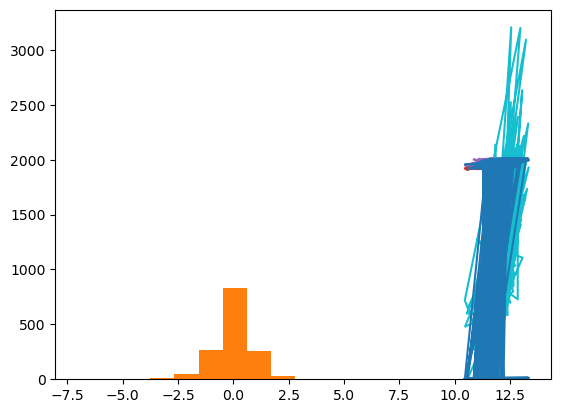

In [56]:
plt.plot(y,X)
plt.plot(y,results.fittedvalues)
plt.hist(results.resid_pearson)

The regression model fits the observed data at 95.1%
and the prediction accuracy(RMSE) is 10.7%

In [27]:
lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
y_head=lgb_regressor.predict(X_test)


print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Root Mean Square Error = ' + str(np.sqrt(mean_squared_error(y_test, y_head)))) 

----------LGBM----------
R square Accuracy:  0.9133162061704284
Mean Absolute Error Accuracy:  0.08140132099035872
Root Mean Square Error = 0.1137285332680266


In [28]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)
print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Root Mean Squared Error Accuracy: ',str(np.sqrt(mean_squared_error(y_test,y_head))))

----------GBR----------
R square Accuracy:  0.9271822147631585
Mean Absolute Error Accuracy:  0.07299382932371916
Root Mean Squared Error Accuracy:  0.10423635486912308


In [29]:
#creating predict column and adding it to DF to show actual vs predicted
y_head=pd.DataFrame(y_head,columns=['Predict'])
y_test.reset_index(drop=True,inplace=True)
y_test_y_head=pd.concat([y_test,y_head],axis=1)
y_test_y_head.head()

,SalePrice,Predict
0,12.618186,12.601485
1,12.100718,12.346138
2,12.345839,12.429364
3,12.276070,11.925773
4,11.512935,11.671498


for submission 

In [30]:
prediction= y_test_y_head.to_csv('data /prediction')

OLS scored the highest R Squared accuracy and the second lowest error accuracy as well. 